# Face Recognition

In [40]:
import cv2 as cv
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras_facenet import FaceNet
from mtcnn.mtcnn import MTCNN

In [41]:
#INITIALIZE
facenet = FaceNet()
faces_embeddings = np.load(".\\faces_embeddings_p2.npz")
Y = faces_embeddings['arr_1']
encoder = LabelEncoder()
encoder.fit(Y)
model = pickle.load(open("svm_model_p2.pkl", 'rb'))

In [42]:
def get_embedding(face_img):
    embedder = FaceNet()
    face_img = face_img.astype('float32')  # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3)
    yhat = embedder.embeddings(face_img)
    return yhat[0]  # 512D image (1x1x512)


def recognize_image(image_path, image_name):
    im = cv.imread(image_path)
    if im is None:
        print("File Not Found")
    else:
        im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
        detector = MTCNN()
        x, y, w, h = detector.detect_faces(im)[0]['box']
        face = im[y:y + h, x:x + w]
        face = cv.resize(face, (160, 160))
        face_embedding = get_embedding(face)
        face_embedding = [face_embedding]
        ypreds = model.predict(face_embedding)
        conf_score = model.predict_proba(face_embedding)[0]
        name='unknown'
        print("Predicting image ", image_name)
        for i, value in np.ndenumerate(conf_score):
            print(f"index:{i[0]} value:{value}")
            if value > .36:
                print(f"index:{i[0]} value:{value}")
                ypreds[0] = i[0]
                name = encoder.inverse_transform(ypreds)[0]
        cv.rectangle(im, (x, y), (x + w, y + h), (255, 0, 255), 3)

        # Postion text below bounding box
        font = cv.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        text_color = (0, 128, 0)  # green
        # Get the size of the text to ensure it fits and for proper vertical offset
        (text_width, text_height), baseline = cv.getTextSize(name, font, font_scale, font_thickness)
        text_x = x
        text_y = y + h + text_height + 5  # 5 pixels margin below the box
        cv.putText(im, str(name), (text_x, text_y), cv.FONT_HERSHEY_SIMPLEX,
                   1, (0, 0, 255), 2, cv.LINE_AA)
        plt.imshow(im)
        plt.show()
        print(name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicting image  t0.jpeg
index:0 value:0.13880990144394012
index:1 value:0.10212773430158827
index:2 value:0.15642192354862186
index:3 value:0.08112534521129869
index:4 value:0.5215150954945511
index:4 value:0.5215150954945511


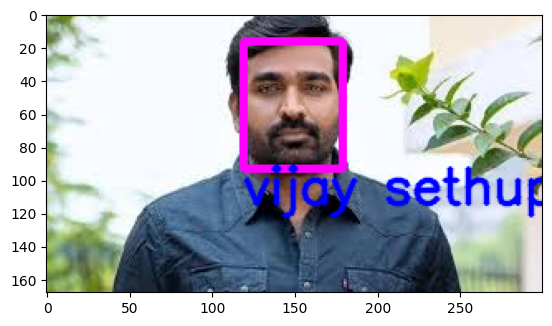

vijay sethupathi
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicting image  t1.jpeg
index:0 value:0.06247609233785363
index:1 value:0.05743893392195857
index:2 value:0.7317334249437478
index:2 value:0.7317334249437478
index:3 value:0.07048218630387246
index:4 value:0.0778693624925672


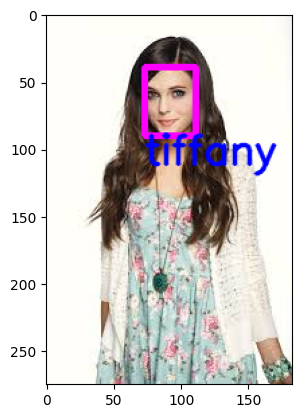

tiffany
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicting image  t2.jpeg
index:0 value:0.06562969878510122
index:1 value:0.07030659228344999
index:2 value:0.6932416986230624
index:2 value:0.6932416986230624
index:3 value:0.09064691157216682
index:4 value:0.08017509873622014


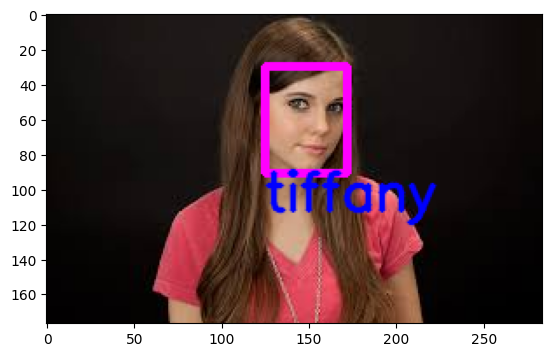

tiffany
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicting image  t3.jpeg
index:0 value:0.23601112538571586
index:1 value:0.17941529899049505
index:2 value:0.2775604689615201
index:3 value:0.19947127987440594
index:4 value:0.10754182678786317


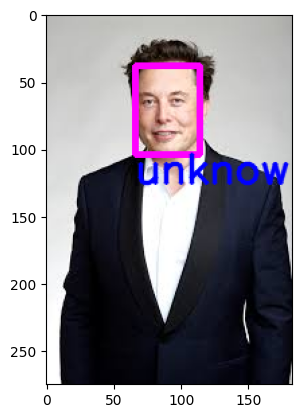

unknown
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicting image  t3.JPG
index:0 value:0.07826311178238125
index:1 value:0.6234173351529801
index:1 value:0.6234173351529801
index:2 value:0.10428484242771419
index:3 value:0.07512566758452736
index:4 value:0.11890904305239716


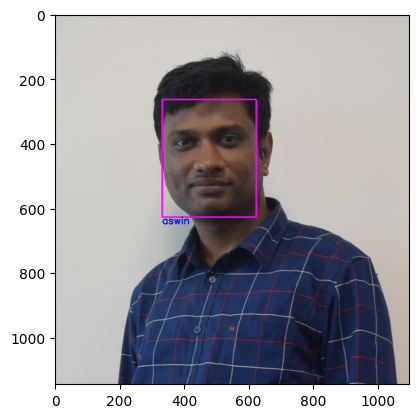

aswin
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicting image  t6.jpeg
index:0 value:0.410850347248803
index:0 value:0.410850347248803
index:1 value:0.12107807208238253
index:2 value:0.1973884948827588
index:3 value:0.12310371438807247
index:4 value:0.14757937139798305


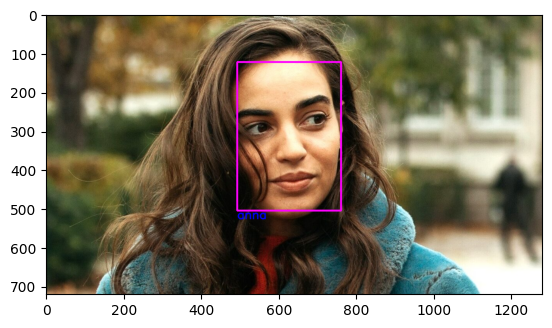

anna


In [43]:
def recognize_folder(folder_path):
    for file_name in os.listdir(folder_path):
        path = os.path.join(folder_path, file_name)
        recognize_image(path, file_name)

recognize_folder(os.path.join(os.getcwd(),"test images"))